In [81]:
import os
import json
import pandas as pd
import os
import numpy as np # type: ignore
from datetime import datetime

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

os.getcwd()
os.chdir(path="/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI")

In [82]:
# Libreriras para modelado y AUTOML
# ==============================================================================
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
#from pycaret.utils import check_metric
from imblearn.over_sampling import *
import os

In [83]:
# You can safely assume that `build_dataset` is correctly implemented
def build_dataset():
    data = [json.loads(x) for x in open("data/Inputs/MLA_100k_checked_v3.jsonlines")]
    target = lambda x: x.get("condition")
    N = -10000
    X_train = data[:N]
    X_test = data[N:]
    y_train = [target(x) for x in X_train]
    y_test = [target(x) for x in X_test]
    for x in X_test:
        del x["condition"]
    return X_train, y_train, X_test, y_test


if __name__ == "__main__":
    print("Loading dataset...")
    # Train and test data following sklearn naming conventions
    # X_train (X_test too) is a list of dicts with information about each item.
    # y_train (y_test too) contains the labels to be predicted (new or used).
    # The label of X_train[i] is y_train[i].
    # The label of X_test[i] is y_test[i].
    X_train, y_train, X_test, y_test = build_dataset()

Loading dataset...


In [84]:
# Convert to DataFrame
df_train = pd.DataFrame(X_train)
df_train['condition'] = y_train

df_test = pd.DataFrame(X_test)
df_test['condition'] = y_test

# Display the first few rows of the DataFrames
print("Training DataFrame head:")
print(df_train.head())

print("\nTesting DataFrame head:")
print(df_test.head())

Training DataFrame head:
                                      seller_address            warranty  \
0  {'country': {'name': 'Argentina', 'id': 'AR'},...                None   
1  {'country': {'name': 'Argentina', 'id': 'AR'},...  NUESTRA REPUTACION   
2  {'country': {'name': 'Argentina', 'id': 'AR'},...                None   
3  {'country': {'name': 'Argentina', 'id': 'AR'},...                None   
4  {'country': {'name': 'Argentina', 'id': 'AR'},...      MI REPUTACION.   

  sub_status condition deal_ids  base_price  \
0         []       new       []        80.0   
1         []      used       []      2650.0   
2         []      used       []        60.0   
3         []       new       []       580.0   
4         []      used       []        30.0   

                                            shipping  \
0  {'local_pick_up': True, 'methods': [], 'tags':...   
1  {'local_pick_up': True, 'methods': [], 'tags':...   
2  {'local_pick_up': True, 'methods': [], 'tags':...   
3  {'local_

In [85]:
df_train.head()


,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6553902747,[],MLA126406,[{'id': 'MLA4695330653-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA4695330653,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,None,NaN,None,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.0,[],buy_it_now,[],,MLA7727150374,[],MLA10267,[{'id': 'MLA7160447179-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA7160447179,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,None,NaN,None,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6561247998,[],MLA1227,[{'id': 'MLA7367189936-916478256'}],2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7367189936,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,None,NaN,None,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.0,[],buy_it_now,[],,None,[],MLA86345,[{'id': 'MLA9191625553-932309698'}],2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA9191625553,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,None,NaN,None,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,30.0,[],buy_it_now,[dragged_bids_and_visits],,MLA3133256685,[],MLA41287,[{'id': 'MLA7787961817-902981678'}],2015-08-28T13:37:41.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7787961817,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/13595-MLA77879618...,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co

In [86]:
os.getcwd()

'/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI'

In [87]:
import pandas as pd

# Read the Parquet files back into DataFrames
df = pd.read_parquet("data/Outputs/df_modelling.parquet")

# Display the first few rows of the loaded DataFrames
print("Loaded Training DataFrame head:")
print(df.shape)
(df.head())

Loaded Training DataFrame head:
(100000, 259)


,base_price,price,accepts_mercadopago,automatic_relist,subtitle,initial_quantity,sold_quantity,available_quantity,local_pick_up,free_shipping,target,mean_base_price_mode,min_base_price_mode,max_base_price_mode,var_base_price_mode,median_base_price_mode,std_base_price_mode,q1_base_price_mode,q3_base_price_mode,mean_base_price_status,min_base_price_status,max_base_price_status,var_base_price_status,median_base_price_status,std_base_price_status,q1_base_price_status,q3_base_price_status,mean_base_price_listing_type_id,min_base_price_listing_type_id,max_base_price_listing_type_id,var_base_price_listing_type_id,median_base_price_listing_type_id,std_base_price_listing_type_id,q1_base_price_listing_type_id,q3_base_price_listing_type_id,mean_base_price_state_id,min_base_price_state_id,max_base_price_state_id,var_base_price_state_id,median_base_price_state_id,std_base_price_state_id,q1_base_price_state_id,q3_base_price_state_id,mean_base_price_automatic_relist,min_base_price_automatic_relist,max_base_price_automatic_relist,var_base_price_automatic_relist,median_base_price_automatic_relist,std_base_price_automatic_relist,q1_base_price_automatic_relist,q3_base_price_automatic_relist,mean_base_price_accepts_mercadopago,min_base_price_accepts_mercadopago,max_base_price_accepts_mercadopago,var_base_price_accepts_mercadopago,median_base_price_accepts_mercadopago,std_base_price_accepts_mercadopago,q1_base_price_accepts_mercadopago,q3_base_price_accepts_mercadopago,mean_base_price_local_pick_up,min_base_price_local_pick_up,max_base_price_local_pick_up,var_base_price_local_pick_up,median_base_price_local_pick_up,std_base_price_local_pick_up,q1_base_price_local_pick_up,q3_base_price_local_pick_up,mean_base_price_free_shipping,min_base_price_free_shipping,max_base_price_free_shipping,var_base_price_free_shipping,median_base_price_free_shipping,std_base_price_free_shipping,q1_base_price_free_shipping,q3_base_price_free_shipping,mean_initial_quantity_mode,min_initial_quantity_mode,max_initial_quantity_mode,var_initial_quantity_mode,median_initial_quantity_mode,std_initial_quantity_mode,q1_initial_quantity_mode,q3_initial_quantity_mode,mean_initial_quantity_status,min_initial_quantity_status,max_initial_quantity_status,var_initial_quantity_status,median_initial_quantity_status,std_initial_quantity_status,q1_initial_quantity_status,q3_initial_quantity_status,mean_initial_quantity_listing_type_id,min_initial_quantity_listing_type_id,max_initial_quantity_listing_type_id,var_initial_quantity_listing_type_id,median_initial_quantity_listing_type_id,std_initial_quantity_listing_type_id,q1_initial_quantity_listing_type_id,q3_initial_quantity_listing_type_id,mean_initial_quantity_state_id,min_initial_quantity_state_id,max_initial_quantity_state_id,var_initial_quantity_state_id,median_initial_quantity_state_id,std_initial_quantity_state_id,q1_initial_quantity_state_id,q3_initial_quantity_state_id,mean_initial_quantity_automatic_relist,min_initial_quantity_automatic_relist,max_initial_quantity_automatic_relist,var_initial_quantity_automatic_relist,median_initial_quantity_automatic_relist,std_initial_quantity_automatic_relist,q1_initial_quantity_automatic_relist,q3_initial_quantity_automatic_relist,mean_initial_quantity_accepts_mercadopago,min_initial_quantity_accepts_mercadopago,max_initial_quantity_accepts_mercadopago,var_initial_quantity_accepts_mercadopago,median_initial_quantity_accepts_mercadopago,std_initial_quantity_accepts_mercadopago,q1_initial_quantity_accepts_mercadopago,q3_initial_quantity_accepts_mercadopago,mean_initial_quantity_local_pick_up,min_initial_quantity_local_pick_up,max_initial_quantity_local_pick_up,var_initial_quantity_local_pick_up,median_initial_quantity_local_pick_up,std_initial_quantity_local_pick_up,q1_initial_quantity_local_pick_up,q3_initial_quantity_local_pick_up,mean_initial_quantity_free_shipping,min_initial_quantity_free_shipping,max_initial_quantity_free_shipping,var_initial_quantity_free_shipping,median_initial_quantity_

In [88]:
df['target'].value_counts(normalize=True)

target
1    0.53758
0    0.46242
Name: proportion, dtype: float64

In [89]:
df.dtypes

base_price                                       int64
price                                            int64
accepts_mercadopago                              int64
automatic_relist                                 int64
subtitle                                         int64
initial_quantity                                 int64
sold_quantity                                    int64
available_quantity                               int64
local_pick_up                                    int64
free_shipping                                    int64
target                                           int64
mean_base_price_mode                             int64
min_base_price_mode                              int64
max_base_price_mode                              int64
var_base_price_mode                              int64
median_base_price_mode                           int64
std_base_price_mode                              int64
q1_base_price_mode                               int64
q3_base_pr

In [90]:
# Select only the numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the covariance matrix
cova_mtrx = df_numeric.cov()

# Find the indices where covariance is zero
high_cov = np.where(cova_mtrx == 0)

# Filter out the positions where x == y (diagonal elements)
high_cov = [(cova_mtrx.index[x], cova_mtrx.columns[y]) for x, y in zip(*high_cov) if x != y]

# Display the results
print(high_cov)

[('base_price', 'subtitle'), ('base_price', 'min_initial_quantity_mode'), ('base_price', 'max_initial_quantity_listing_type_id'), ('base_price', 'min_initial_quantity_state_id'), ('base_price', 'q1_initial_quantity_state_id'), ('base_price', 'min_initial_quantity_automatic_relist'), ('base_price', 'max_initial_quantity_automatic_relist'), ('base_price', 'min_initial_quantity_accepts_mercadopago'), ('base_price', 'median_initial_quantity_accepts_mercadopago'), ('base_price', 'q1_initial_quantity_accepts_mercadopago'), ('base_price', 'min_initial_quantity_local_pick_up'), ('base_price', 'max_initial_quantity_local_pick_up'), ('base_price', 'median_initial_quantity_local_pick_up'), ('base_price', 'q1_initial_quantity_local_pick_up'), ('base_price', 'min_initial_quantity_free_shipping'), ('base_price', 'max_initial_quantity_free_shipping'), ('base_price', 'q1_initial_quantity_free_shipping'), ('base_price', 'min_sold_quantity_mode'), ('base_price', 'median_sold_quantity_mode'), ('base_pric

In [91]:
df_numeric.head()

,base_price,price,accepts_mercadopago,automatic_relist,subtitle,initial_quantity,sold_quantity,available_quantity,local_pick_up,free_shipping,target,mean_base_price_mode,min_base_price_mode,max_base_price_mode,var_base_price_mode,median_base_price_mode,std_base_price_mode,q1_base_price_mode,q3_base_price_mode,mean_base_price_status,min_base_price_status,max_base_price_status,var_base_price_status,median_base_price_status,std_base_price_status,q1_base_price_status,q3_base_price_status,mean_base_price_listing_type_id,min_base_price_listing_type_id,max_base_price_listing_type_id,var_base_price_listing_type_id,median_base_price_listing_type_id,std_base_price_listing_type_id,q1_base_price_listing_type_id,q3_base_price_listing_type_id,mean_base_price_state_id,min_base_price_state_id,max_base_price_state_id,var_base_price_state_id,median_base_price_state_id,std_base_price_state_id,q1_base_price_state_id,q3_base_price_state_id,mean_base_price_automatic_relist,min_base_price_automatic_relist,max_base_price_automatic_relist,var_base_price_automatic_relist,median_base_price_automatic_relist,std_base_price_automatic_relist,q1_base_price_automatic_relist,q3_base_price_automatic_relist,mean_base_price_accepts_mercadopago,min_base_price_accepts_mercadopago,max_base_price_accepts_mercadopago,var_base_price_accepts_mercadopago,median_base_price_accepts_mercadopago,std_base_price_accepts_mercadopago,q1_base_price_accepts_mercadopago,q3_base_price_accepts_mercadopago,mean_base_price_local_pick_up,min_base_price_local_pick_up,max_base_price_local_pick_up,var_base_price_local_pick_up,median_base_price_local_pick_up,std_base_price_local_pick_up,q1_base_price_local_pick_up,q3_base_price_local_pick_up,mean_base_price_free_shipping,min_base_price_free_shipping,max_base_price_free_shipping,var_base_price_free_shipping,median_base_price_free_shipping,std_base_price_free_shipping,q1_base_price_free_shipping,q3_base_price_free_shipping,mean_initial_quantity_mode,min_initial_quantity_mode,max_initial_quantity_mode,var_initial_quantity_mode,median_initial_quantity_mode,std_initial_quantity_mode,q1_initial_quantity_mode,q3_initial_quantity_mode,mean_initial_quantity_status,min_initial_quantity_status,max_initial_quantity_status,var_initial_quantity_status,median_initial_quantity_status,std_initial_quantity_status,q1_initial_quantity_status,q3_initial_quantity_status,mean_initial_quantity_listing_type_id,min_initial_quantity_listing_type_id,max_initial_quantity_listing_type_id,var_initial_quantity_listing_type_id,median_initial_quantity_listing_type_id,std_initial_quantity_listing_type_id,q1_initial_quantity_listing_type_id,q3_initial_quantity_listing_type_id,mean_initial_quantity_state_id,min_initial_quantity_state_id,max_initial_quantity_state_id,var_initial_quantity_state_id,median_initial_quantity_state_id,std_initial_quantity_state_id,q1_initial_quantity_state_id,q3_initial_quantity_state_id,mean_initial_quantity_automatic_relist,min_initial_quantity_automatic_relist,max_initial_quantity_automatic_relist,var_initial_quantity_automatic_relist,median_initial_quantity_automatic_relist,std_initial_quantity_automatic_relist,q1_initial_quantity_automatic_relist,q3_initial_quantity_automatic_relist,mean_initial_quantity_accepts_mercadopago,min_initial_quantity_accepts_mercadopago,max_initial_quantity_accepts_mercadopago,var_initial_quantity_accepts_mercadopago,median_initial_quantity_accepts_mercadopago,std_initial_quantity_accepts_mercadopago,q1_initial_quantity_accepts_mercadopago,q3_initial_quantity_accepts_mercadopago,mean_initial_quantity_local_pick_up,min_initial_quantity_local_pick_up,max_initial_quantity_local_pick_up,var_initial_quantity_local_pick_up,median_initial_quantity_local_pick_up,std_initial_quantity_local_pick_up,q1_initial_quantity_local_pick_up,q3_initial_quantity_local_pick_up,mean_initial_quantity_free_shipping,min_initial_quantity_free_shipping,max_initial_quantity_free_shipping,var_initial_quantity_free_shipping,median_initial_quantity_

In [92]:
# Assuming data_final is your DataFrame and high_corr_var is your list of correlated variables
corr_matrix = df_numeric.corr().abs()
high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
high_corr_var

[('base_price', 'price'),
 ('base_price', 'price_square'),
 ('price', 'price_square'),
 ('price', 'price_sqrt'),
 ('accepts_mercadopago', 'mean_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'min_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'max_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'var_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'median_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'std_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'q1_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'q3_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'mean_initial_quantity_accepts_mercadopago'),
 ('accepts_mercadopago', 'max_initial_quantity_accepts_mercadopago'),
 ('accepts_mercadopago', 'var_initial_quantity_accepts_mercadopago'),
 ('accepts_mercadopago', 'std_initial_quantity_accepts_mercadopago'),
 ('accepts_mercadopago', 'q3_initial_quantity_accepts_mercadopago'),
 ('accepts_mercadopago'

In [93]:
# Create a set to store columns to be removed
columns_to_remove = set()

for pair in high_corr_var:
    var_1 = df_numeric[pair[0]].var()
    var_2 = df_numeric[pair[1]].var()

    if not pd.isna(var_1) and not pd.isna(var_2):
        diff_var = var_1 - var_2
        if diff_var > 1e-10:  # Adjust the threshold based on your data
            print('Queda', pair[0], 'varianza:', f'{var_1:.1f}', '| Elimina:', pair[1], 'varianza:', f'{var_2:.1f}')
            columns_to_remove.add(pair[1])
        elif diff_var < -1e-10:  # Adjust the threshold based on your data
            print('Queda', pair[1], 'varianza:', f'{var_2:.1f}', '| Elimina:', pair[0], 'varianza:', f'{var_1:.1f}')
            columns_to_remove.add(pair[0])

# Remove the columns outside the loop
df_numeric.drop(columns=columns_to_remove, inplace=True)

print(df_numeric.shape)

Queda price varianza: 74358322068651.4 | Elimina: base_price varianza: 49385311861387.5
Queda price_square varianza: 274349539869425398250806599221248.0 | Elimina: base_price varianza: 49385311861387.5
Queda price_square varianza: 274349539869425398250806599221248.0 | Elimina: price varianza: 74358322068651.4
Queda price varianza: 74358322068651.4 | Elimina: price_sqrt varianza: 51465.6
Queda mean_base_price_accepts_mercadopago varianza: 501794686.6 | Elimina: accepts_mercadopago varianza: 0.0
Queda max_base_price_accepts_mercadopago varianza: 106523823506978448.0 | Elimina: accepts_mercadopago varianza: 0.0
Queda var_base_price_accepts_mercadopago varianza: 55136788830410180795564032.0 | Elimina: accepts_mercadopago varianza: 0.0
Queda median_base_price_accepts_mercadopago varianza: 261399237.5 | Elimina: accepts_mercadopago varianza: 0.0
Queda std_base_price_accepts_mercadopago varianza: 1003361239671.6 | Elimina: accepts_mercadopago varianza: 0.0
Queda q1_base_price_accepts_mercadop

In [94]:
dataset_00 = pd.concat([df.select_dtypes(exclude=[np.number]), df_numeric], axis=1)

In [95]:
# Remove duplicates from the DataFrame based on the 'id_peticion' column
#dataset_01 = dataset_00.drop_duplicates(subset=['id'])

In [96]:
dataset_00.shape

(100000, 106)

In [97]:
dataset_00.head(2)


,subtitle,target,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,q3_base_price_listing_type_id,min_base_price_state_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,var_base_price_free_shipping,min_initial_quantity_mode,max_initial_quantity_mode,min_initial_quantity_status,max_initial_quantity_status,median_initial_quantity_status,q1_initial_quantity_status,max_initial_quantity_listing_type_id,var_initial_quantity_listing_type_id,std_initial_quantity_listing_type_id,min_initial_quantity_state_id,max_initial_quantity_state_id,var_initial_quantity_state_id,median_initial_quantity_state_id,q1_initial_quantity_state_id,q3_initial_quantity_state_id,min_initial_quantity_automatic_relist,max_initial_quantity_automatic_relist,min_initial_quantity_accepts_mercadopago,median_initial_quantity_accepts_mercadopago,q1_initial_quantity_accepts_mercadopago,min_initial_quantity_local_pick_up,max_initial_quantity_local_pick_up,median_initial_quantity_local_pick_up,q1_initial_quantity_local_pick_up,min_initial_quantity_free_shipping,max_initial_quantity_free_shipping,q1_initial_quantity_free_shipping,min_sold_quantity_mode,median_sold_quantity_mode,q1_sold_quantity_mode,min_sold_quantity_status,median_sold_quantity_status,q1_sold_quantity_status,q3_sold_quantity_status,min_sold_quantity_listing_type_id,max_sold_quantity_listing_type_id,var_sold_quantity_listing_type_id,q1_sold_quantity_listing_type_id,min_sold_quantity_state_id,median_sold_quantity_state_id,q1_sold_quantity_state_id,q3_sold_quantity_state_id,min_sold_quantity_automatic_relist,median_sold_quantity_automatic_relist,q1_sold_quantity_automatic_relist,min_sold_quantity_accepts_mercadopago,median_sold_quantity_accepts_mercadopago,q1_sold_quantity_accepts_mercadopago,q3_sold_quantity_accepts_mercadopago,min_sold_quantity_local_pick_up,median_sold_quantity_local_pick_up,q1_sold_quantity_local_pick_up,q3_sold_quantity_local_pick_up,min_sold_quantity_free_shipping,median_sold_quantity_free_shipping,q1_sold_quantity_free_shipping,listing_type_id_gold_special,category_id_MLA1227,category_id_Rare,currency_id_ARS,currency_id_USD,country_name_,country_name_Argentina,country_id_,country_id_AR,state_name_Rare,state_id_Rare,descrip_mdo_0_Efectivo,descrip_mdo_0_Rare,descrip_mdo_0_Transferencia bancaria,id_mdo_0_MLABC,id_mdo_0_MLACD,id_mdo_0_MLAMC,id_mdo_0_MLAMO,id_mdo_0_MLAMS,id_mdo_0_MLAOT,id_mdo_0_MLATB,id_mdo_0_MLAVE,id_mdo_0_MLAVS,id_mdo_0_MLAWC,id_mdo_0_MLAWT,warranty_cleaned_12 meses,warranty_cleaned_3 meses,warranty_cleaned_6 meses,warranty_cleaned_missing,warranty_cleaned_otros,warranty_cleaned_sí,first_two_words_title_Rare,price_square,price_log,initial_quantity_square,initial_quantity_log,sold_quantity_square,sold_quantity_sqrt
0,0,1,109329072070789,2879725527,78174286476326,570,0,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,1,9999,1,9999,1,1,9999,139594,373,1,9999,231224,1,1,3,1,9999,1,1,1,1,9999,1,1,1,9999,1,0,0,0,0,0,0,0,0,418,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,6400,4.382027,1,0.0,0,0.0
1,0,0,9144042,2879725527,21082242084,1999,0,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,1,9999,1,9999,1,1,9999,156604,395,1,9999,231224,1,1,3,1,9999,1,1,1,1,9999,1,1,1,9999,1,0,0,0,0,0,0,0,0,8676,8981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,7022500,7.882315,1,0.0,0,0.0


In [98]:
data = dataset_00.sample(frac=0.70, random_state=2024)
data_validacion = dataset_00.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_validacion.reset_index(inplace=True, drop=True)
print(data.shape)
print(data_validacion.shape)

(70000, 106)
(30000, 106)


In [99]:
col_categoricas = data.select_dtypes('object').columns
col_categoricas

Index([], dtype='object')

In [100]:
col_numericas = data.columns.drop(col_categoricas)
col_numericas

Index(['subtitle', 'target', 'var_base_price_mode', 'var_base_price_status',
       'var_base_price_listing_type_id', 'q3_base_price_listing_type_id',
       'min_base_price_state_id', 'var_base_price_state_id',
       'var_base_price_automatic_relist', 'var_base_price_accepts_mercadopago',
       ...
       'warranty_cleaned_missing', 'warranty_cleaned_otros',
       'warranty_cleaned_sí', 'first_two_words_title_Rare', 'price_square',
       'price_log', 'initial_quantity_square', 'initial_quantity_log',
       'sold_quantity_square', 'sold_quantity_sqrt'],
      dtype='object', length=106)

In [101]:
data.head()

,subtitle,target,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,q3_base_price_listing_type_id,min_base_price_state_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,var_base_price_free_shipping,min_initial_quantity_mode,max_initial_quantity_mode,min_initial_quantity_status,max_initial_quantity_status,median_initial_quantity_status,q1_initial_quantity_status,max_initial_quantity_listing_type_id,var_initial_quantity_listing_type_id,std_initial_quantity_listing_type_id,min_initial_quantity_state_id,max_initial_quantity_state_id,var_initial_quantity_state_id,median_initial_quantity_state_id,q1_initial_quantity_state_id,q3_initial_quantity_state_id,min_initial_quantity_automatic_relist,max_initial_quantity_automatic_relist,min_initial_quantity_accepts_mercadopago,median_initial_quantity_accepts_mercadopago,q1_initial_quantity_accepts_mercadopago,min_initial_quantity_local_pick_up,max_initial_quantity_local_pick_up,median_initial_quantity_local_pick_up,q1_initial_quantity_local_pick_up,min_initial_quantity_free_shipping,max_initial_quantity_free_shipping,q1_initial_quantity_free_shipping,min_sold_quantity_mode,median_sold_quantity_mode,q1_sold_quantity_mode,min_sold_quantity_status,median_sold_quantity_status,q1_sold_quantity_status,q3_sold_quantity_status,min_sold_quantity_listing_type_id,max_sold_quantity_listing_type_id,var_sold_quantity_listing_type_id,q1_sold_quantity_listing_type_id,min_sold_quantity_state_id,median_sold_quantity_state_id,q1_sold_quantity_state_id,q3_sold_quantity_state_id,min_sold_quantity_automatic_relist,median_sold_quantity_automatic_relist,q1_sold_quantity_automatic_relist,min_sold_quantity_accepts_mercadopago,median_sold_quantity_accepts_mercadopago,q1_sold_quantity_accepts_mercadopago,q3_sold_quantity_accepts_mercadopago,min_sold_quantity_local_pick_up,median_sold_quantity_local_pick_up,q1_sold_quantity_local_pick_up,q3_sold_quantity_local_pick_up,min_sold_quantity_free_shipping,median_sold_quantity_free_shipping,q1_sold_quantity_free_shipping,listing_type_id_gold_special,category_id_MLA1227,category_id_Rare,currency_id_ARS,currency_id_USD,country_name_,country_name_Argentina,country_id_,country_id_AR,state_name_Rare,state_id_Rare,descrip_mdo_0_Efectivo,descrip_mdo_0_Rare,descrip_mdo_0_Transferencia bancaria,id_mdo_0_MLABC,id_mdo_0_MLACD,id_mdo_0_MLAMC,id_mdo_0_MLAMO,id_mdo_0_MLAMS,id_mdo_0_MLAOT,id_mdo_0_MLATB,id_mdo_0_MLAVE,id_mdo_0_MLAVS,id_mdo_0_MLAWC,id_mdo_0_MLAWT,warranty_cleaned_12 meses,warranty_cleaned_3 meses,warranty_cleaned_6 meses,warranty_cleaned_missing,warranty_cleaned_otros,warranty_cleaned_sí,first_two_words_title_Rare,price_square,price_log,initial_quantity_square,initial_quantity_log,sold_quantity_square,sold_quantity_sqrt
0,0,1,9144042,2879725527,78174286476326,570,1,336989838,51819250992331,50503409723708,62068994884541,50921086046018,1,9999,1,9999,1,1,9999,139594,373,1,999,14823,1,1,4,1,9999,1,1,1,1,9999,1,1,1,9999,1,0,0,0,0,0,0,0,0,418,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,16641,4.859812,1,0.000000,0,0.0
1,0,1,109329072070789,2879725527,78174286476326,570,0,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,1,9999,1,9999,1,1,9999,139594,373,1,9999,231224,1,1,3,1,9999,1,1,1,1,9999,1,1,1,9999,1,0,0,0,0,0,0,0,0,418,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,7225,4.442651,16,1.386294,0,0.0
2,0,0,9144042,2879725527,78174286476326,570,0,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,1,9999,1,9999,1,1,9999,139594,373,1,9999,231224,1,1,3,1,9999,1,1,1,1,9999,1,1,1,9999,1,0,0,0,0,0,0,0,0,418,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,2304,3.871201,1,0.000000,0,0.0
3,0,1,9144042,2879725527,78174286476326,570,0,2192546357,51819250992331,50503409723708,62068994884

In [102]:
s = ClassificationExperiment()

model_setup = s.setup(
    data=data,
    target='target', 
    session_id=123,
    normalize=True,
    #normalize_method='minmax',
    fix_imbalance=True,
    remove_outliers=True,
   # ignore_features=['category_id','date_created','stop_time','start_time',
   # 'state_name','seller_id','first_two_words_title'],
    feature_selection=True,
 #   ignore_low_variance=True,
#    feature_ratio=True,
    remove_multicollinearity=True
   # multicollinearity_threshold=0.6,
   # numeric_features=col_numericas
#    pca=True
)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(70000, 106)"
4,Transformed data shape,"(69916, 22)"
5,Transformed train set shape,"(48916, 22)"
6,Transformed test set shape,"(21000, 22)"
7,Numeric features,105
8,Rows with missing values,0.0%
9,Preprocess,True


In [103]:
# OOP API
best = s.compare_models(sort='Accuracy', include = ['rf','lightgbm','et','dt','gbc','knn','ada','lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8387,0.9226,0.8241,0.8694,0.8461,0.6769,0.6780,1.7800
gbc,Gradient Boosting Classifier,0.8273,0.9161,0.8195,0.8536,0.8362,0.6537,0.6543,1.9950
rf,Random Forest Classifier,0.8266,0.9080,0.8153,0.8556,0.8349,0.6524,0.6533,1.8600
et,Extra Trees Classifier,0.8194,0.8704,0.7973,0.8570,0.8261,0.6387,0.6405,1.8330
ada,Ada Boost Classifier,0.8181,0.9075,0.8406,0.8248,0.8326,0.6335,0.6338,1.5660
knn,K Neighbors Classifier,0.8125,0.8845,0.8002,0.8433,0.8212,0.6244,0.6253,1.5810
dt,Decision Tree Classifier,0.8079,0.8300,0.7735,0.8555,0.8125,0.6166,0.6199,1.3740
lr,Logistic Regression,0.7986,0.8847,0.7435,0.8632,0.7988,0.5994,0.6061,1.3420


In [104]:
m1_tuneado = s.tune_model(best, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8390,0.9192,0.8248,0.8693,0.8465,0.6774,0.6785
1,0.8478,0.9302,0.8289,0.8810,0.8542,0.6952,0.6966
2,0.8467,0.9275,0.8278,0.8802,0.8532,0.6932,0.6946
3,0.8363,0.9184,0.8297,0.8610,0.8451,0.6717,0.6723
4,0.8384,0.9235,0.8312,0.8633,0.8469,0.6759,0.6764
5,0.8420,0.9247,0.8304,0.8700,0.8498,0.6834,0.6843
6,0.8400,0.9221,0.8236,0.8719,0.8471,0.6796,0.6808
7,0.8378,0.9243,0.8221,0.8692,0.8450,0.6751,0.6762
8,0.8484,0.9273,0.8342,0.8778,0.8555,0.6962,0.6972


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [120]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [107]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

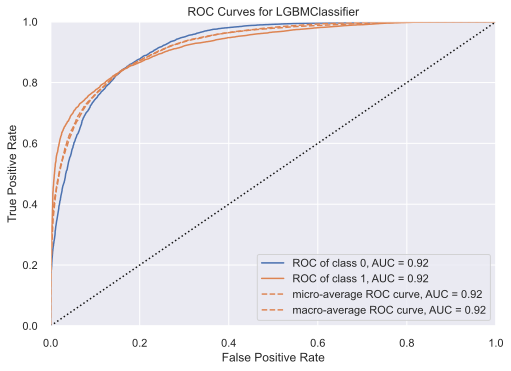

In [108]:
s.plot_model(best, plot='auc')

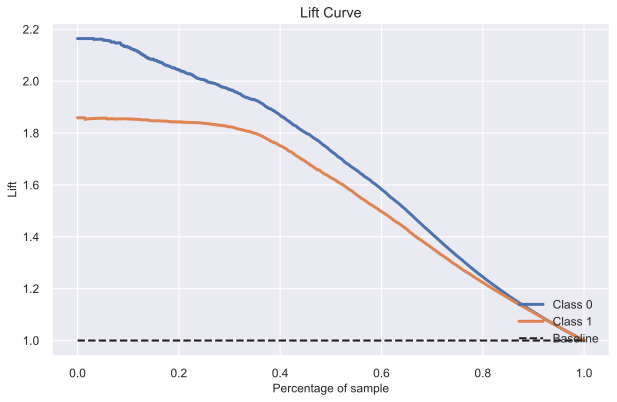

In [109]:
s.plot_model(best, plot="lift")

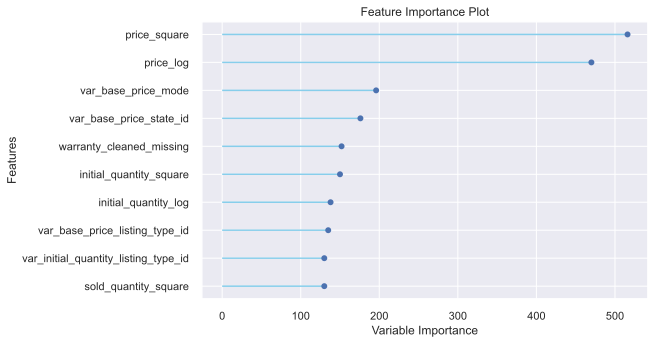

In [110]:
s.plot_model(best, plot="feature")

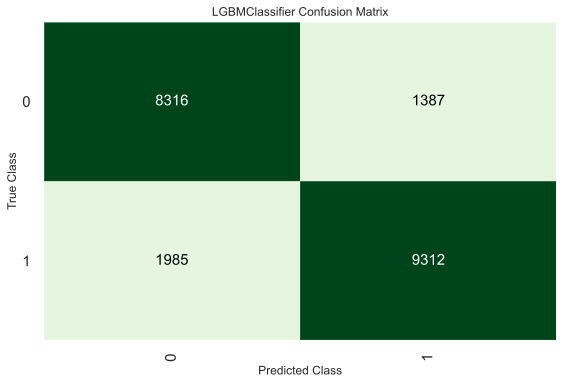

In [111]:
s.plot_model(best, plot="confusion_matrix")

In [112]:

# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8394,0.9232,0.8243,0.8704,0.8467,0.6784,0.6795


,subtitle,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,q3_base_price_listing_type_id,min_base_price_state_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,...,first_two_words_title_Rare,price_square,price_log,initial_quantity_square,initial_quantity_log,sold_quantity_square,sold_quantity_sqrt,target,prediction_label,prediction_score
37856,0,109329072070789,2879725527,1824627272,1000,0,2192546357,51819250992331,50503409723708,62068994884541,...,1,4900,4.248495,1,0.000000,0,0.000000,0,0,0.9726
18569,0,9144042,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,1,2500,3.912023,1,0.000000,0,0.000000,1,0,0.8659
69810,0,109329072070789,2879725527,78174286476326,570,0,2192546357,51819250992331,50503409723708,62068994884541,...,1,9801,4.595120,1,0.000000,0,0.000000,0,0,0.6816
594,0,109329072070789,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,1,32400,5.192957,144,2.484907,0,0.000000,1,1,0.9658
10428,0,9144042,2879725527,1824627272,1000,1,141043796917680,51819250992331,50503409723708,62068994884541,...,1,77841,5.631212,1,0.000000,0,0.000000,1,0,0.8990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58648,0,9144042,2879725527,78174286476326,570,0,2192546357,51819250992331,50503409723708,62068994884541,...,1,6400,4.382027,81,2.197225,1,1.000000,1,1,0.9701
57600,0,9144042,2879725527,78174286476326,570,0,2192546357,51819250992331,50503409723708,62068994884541,...,1,3841600,7.580700,4,0.693147,1,1.000000,1,1,0.9828
27552,0,109329072070789,2879725527,50769786,1765,1,5172528690,54016172,50503409723708,62068994884541,...,1,12250000,8.160519,1,0.000000,0,0.000000,0,1,0.9871
24048,0,9144042,2879725527,7122478201,2000,0,2192546357,51819250992331,50503409723708,62068994884541,...,1,89401,5.700444,25,1.609438,3025,7.416198,1,1,0.9988


In [113]:
# OOP API
predictions = s.predict_model(best, data=data_validacion)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8423,0.9254,0.8279,0.8717,0.8493,0.6841,0.6851


,subtitle,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,q3_base_price_listing_type_id,min_base_price_state_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,...,first_two_words_title_Rare,price_square,price_log,initial_quantity_square,initial_quantity_log,sold_quantity_square,sold_quantity_sqrt,target,prediction_label,prediction_score
0,0,109329072070789,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,1,96100,5.736572,1,0.00000,0,0.0,1,1,0.5792
1,0,109329072070789,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,1,2500,3.912023,10000,4.60517,1,1.0,1,1,0.9846
2,0,109329072070789,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,1,202500,6.109248,1,0.00000,0,0.0,1,1,0.5346
3,0,9144042,2879725527,78174286476326,570,1,1741142599,51819250992331,50503409723708,62068994884541,...,1,24025,5.043425,1,0.00000,0,0.0,1,1,0.5104
4,0,109329072070789,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,1,900,3.401197,1,0.00000,0,0.0,0,0,0.7655


In [114]:
a = s.predict_model(best, data=data_validacion, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8423,0.9254,0.8279,0.8717,0.8493,0.6841,0.6851


In [115]:
a.head()

,subtitle,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,q3_base_price_listing_type_id,min_base_price_state_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,...,price_square,price_log,initial_quantity_square,initial_quantity_log,sold_quantity_square,sold_quantity_sqrt,target,prediction_label,prediction_score_0,prediction_score_1
0,0,109329072070789,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,96100,5.736572,1,0.00000,0,0.0,1,1,0.4208,0.5792
1,0,109329072070789,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,2500,3.912023,10000,4.60517,1,1.0,1,1,0.0154,0.9846
2,0,109329072070789,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,202500,6.109248,1,0.00000,0,0.0,1,1,0.4654,0.5346
3,0,9144042,2879725527,78174286476326,570,1,1741142599,51819250992331,50503409723708,62068994884541,...,24025,5.043425,1,0.00000,0,0.0,1,1,0.4896,0.5104
4,0,109329072070789,2879725527,78174286476326,570,1,141043796917680,51819250992331,50503409723708,62068994884541,...,900,3.401197,1,0.00000,0,0.0,0,0,0.7655,0.2345


In [116]:
a[['target','prediction_score_1']].groupby(a.prediction_label)['prediction_score_1'].agg(['count','min','max'])

,count,min,max
prediction_label,,,
0,14710,0.0028,0.4999
1,15290,0.5001,0.9995


In [117]:
a.shape

(30000, 109)

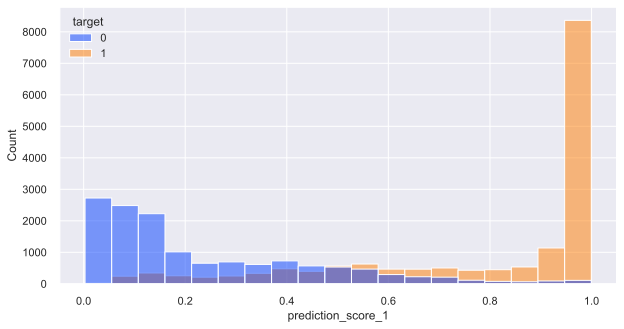

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

#################### Histograma Prob
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=a, x="prediction_score_1", hue="target", palette='bright')
#plt.xlim(0, 0.4)
#plt.ylim(0, 50)
plt.show()

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.993,1.000,0.996,3000.0,2992.0,8.0,1610.0,3000,99.733,3000.0,2992.0,3000,8.0,10.0,18.584,18.634,0.058,18.526,1.858
1,2,0.979,0.993,0.987,3000.0,2970.0,30.0,1610.0,3000,99.000,6000.0,5962.0,6000,38.0,20.0,37.031,37.267,0.273,36.758,1.852
2,3,0.931,0.979,0.961,3000.0,2895.0,105.0,1610.0,3000,96.500,9000.0,8857.0,9000,143.0,30.0,55.012,55.901,1.029,53.983,1.834
3,4,0.690,0.931,0.818,3000.0,2491.0,509.0,1610.0,3000,83.033,12000.0,11348.0,12000,652.0,40.0,70.484,74.534,4.691,65.793,1.762
4,5,0.512,0.690,0.590,3000.0,1820.0,1180.0,1610.0,3000,60.667,15000.0,13168.0,15000,1832.0,50.0,81.789,93.168,13.180,68.609,1.636
5,6,0.366,0.512,0.437,3000.0,1298.0,1702.0,1610.0,1100,43.267,18000.0,14466.0,16100,3534.0,60.0,89.851,100.000,25.424,64.427,1.498
6,7,0.198,0.366,0.281,3000.0,820.0,2180.0,1610.0,0,27.333,21000.0,15286.0,16100,5714.0,70.0,94.944,100.000,41.108,53.836,1.356
7,8,0.116,0.198,0.148,3000.0,482.0,2518.0,1610.0,0,16.067,24000.0,15768.0,16100,8232.0,80.0,97.938,100.000,59.223,38.715,1.224
8,9,0.060,0.116,0.090,3000.0,288.0,2712.0,1610.0,0,9.600,27000.0,16056.0,16100,10944.0,90.0,99.727,100.000,78.734,20.993,1.108
9,10,0.003,0.060,0.025,3000.0,44.0,2956.0,1610.0,0,1.467,30000.0,16100.0,16100,13900.0,100.0,100.000,100.000,100.000,0.000,1.000


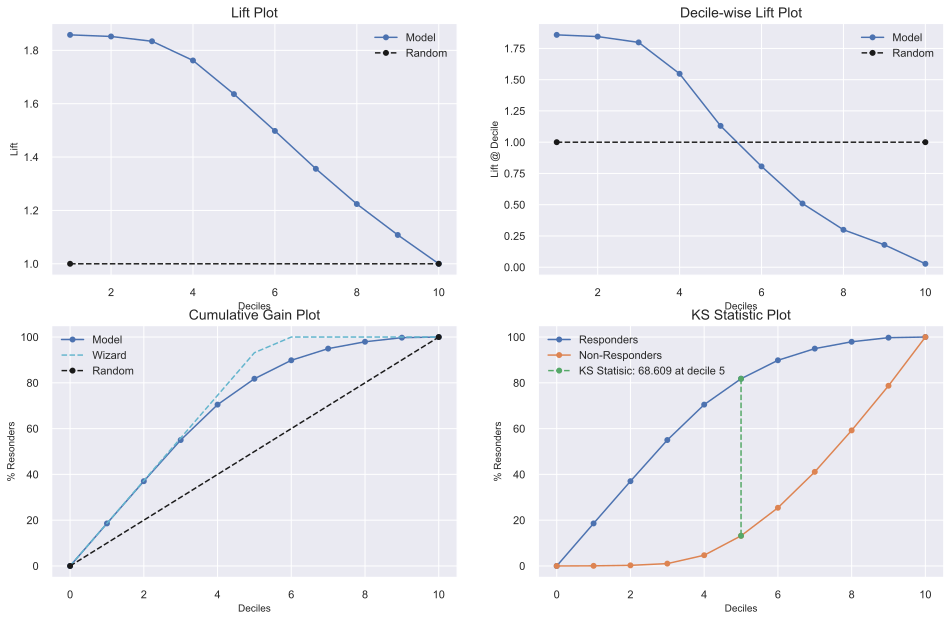

In [119]:
import kds # LIFT PLOT
report_lift = kds.metrics.report(a['target'], a['prediction_score_1'])
report_lift